<h1>Bài 4 _ Thực hành

<h4>(Lập trình) Sinh viên thực hiện gom cụm dữ liệu Titanic4 bằng thuật toán k-Means và so sánh với thuộc tính phân lớp có sẵn, sử dụng ma trận nhầm lẫn và các độ đo Precision, Recall, F1-score.

<p>Link tham khảo: https://www.kaggle.com/code/vishwaparekh/cluster-analysis-of-breast-cancer-dataset/notebook

<H3>Import các thư viện cần thiết

In [22]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

<h3>1.	Nhập dữ liệu, thống kê các thông tin cơ bản, xử lý dữ liệu bị thiếu.

In [13]:
df = pd.read_csv("E:\\IS252\\IS252.M21\\Lab5\\data\\Cancer.csv")

<li>Xem 12 dòng dữ liệu đầu

In [14]:
df.head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


<li>Trả thông tin của những column

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<li>Kiểm tra dữ liệu

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Unnamed: 32,569,100.0
compactness_se,0,0.0
fractal_dimension_worst,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0


<P><strong>Kết luận: </strong>Tiền xử lý dữ liệu</p>

<p>Xóa thuộc tính unnamed và id vì không cần thiết trong quá trình thực thi

In [17]:
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)

<h3>2.	Xem số lượng biến diagnosis với B(lành tính) và M(ác tính)

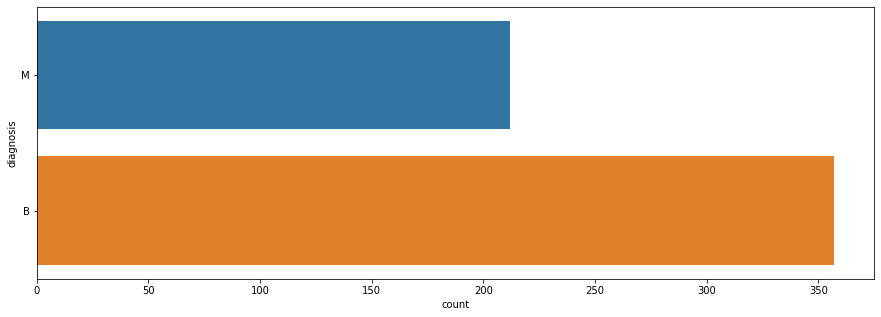

In [19]:
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'diagnosis',data = df)
plt.show()

<h3>3.	Chuyển đổi biến diagnosis từ M(ác tính) và B(lành tính) thành 0 và 1

In [20]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [23]:
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
datas.columns = list(df.iloc[:,1:32].columns)
datas['diagnosis'] = df['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

c:\Users\PhuongUyen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\PhuongUyen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.922005
[t-SNE] KL divergence after 3450 iterations: 0.888686


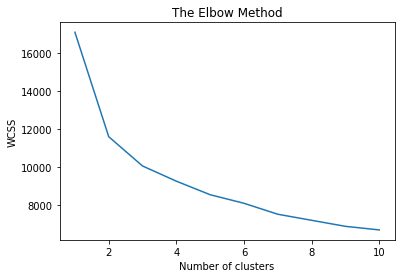

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'Actual clusters')

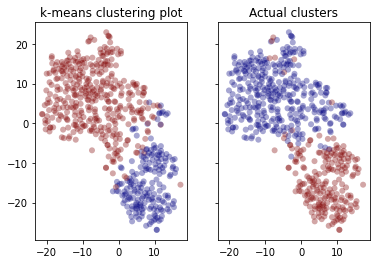

In [25]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters = 2, init = 'random')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')